In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [13]:
# MPC import
from LinearMPC_deliverable_5_1.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [28]:
Ts = 0.05
sim_time = 15.0; 
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

delta2_s (trim) = 0.0
du bounds = -0.2617993877991494 0.2617993877991494
=> abs bounds = -0.2617993877991494 0.2617993877991494
['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: u_x: [0.26179939]
u_y: [-0.26179939]
vz: 10.0 dhat: 0.0 Pavg: 39.9999999731086
u_z: [39.99999997]
u_roll: [0.]

Simulating time 0.05: u_x: [0.26179939]
u_y: [-0.25658695]
vz: 9.876484824865246 dhat: 0.14520965011322673 Pavg: 40.0000291135996
u_z: [40.00002911]
u_roll: [-3.40077254e-05]

Simulating time 0.10: u_x: [0.04342147]
u_y: [-0.065346]
vz: 9.758057535677827 dhat: 0.35654261479541205 Pavg: 40.00002605116104
u_z: [40.00002605]
u_roll: [-0.02112771]

Simulating time 0.15: u_x: [-0.12559168]
u_y: [0.10736055]
vz: 9.659672310712674 dhat: 0.6313005822176194 Pavg: 40.00002446249427
u_z: [40.00002446]
u_roll: [-0.08721602]

Simulating time 0.20: u_x: [-0.25097934]
u_y: [-0.190693]
vz: 9.538331447824559 dhat: 0.881475883314792 Pavg: 40.00002789275075
u_z: [40.00002789]
u_roll: [-0.18617767]

Simulating time 0

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

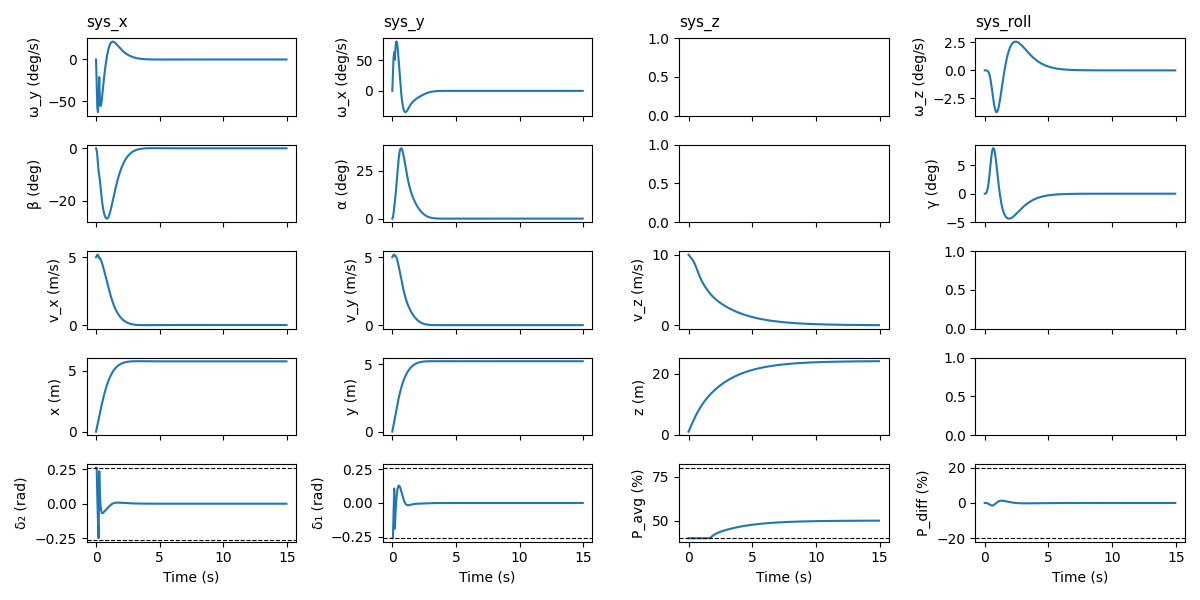

In [29]:
plot_static_states_inputs(
    T=t_cl[:-1],      # time for inputs
    X=x_cl[:, :-1],   # match the same length
    U=u_cl,           # DON'T slice
    Ref=None,
    type="vel"
)